# Pakistan Healthy Diet Affordability Analysis (2017-2024)

This notebook provides a comprehensive analysis of the affordability of a healthy diet in Pakistan from 2017 to 2024. The analysis includes data preprocessing, exploratory data analysis (EDA), feature engineering, and machine learning models to predict food affordability crises. The notebook is structured as follows:

1. **Initialization & Environment Setup**
2. **Data Loading & Cleaning**
3. **Exploratory Data Analysis (EDA)**
4. **Feature Engineering**
5. **Model Development**
6. **Model Evaluation**
7. **Insights & Recommendations**

---

> **Environment:** `conda activate ml_env`  
> **Dataset:** FAOSTAT 2017-2026 Pakistan Food Security Metrics

## 01️⃣ INITIALIZATION & ENVIRONMENT SETUP

In [105]:
# Initialization & Environment Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set global configurations
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Random seed for reproducibility
RANDOM_STATE = 42

## 02️⃣ DATA INGESTION & QUALITY ASSESSMENT

In [106]:
# Data Loading & Cleaning
DATA_PATH = "path_to_your_dataset.csv"
data = pd.read_csv(DATA_PATH)

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Dataset Info:")
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Fill missing values (example: forward fill for simplicity)
data.fillna(method='ffill', inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_dataset.csv'

## 03️⃣ ADVANCED DATA PREPROCESSING

In [ ]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of key features
sns.histplot(data['feature_name'], kde=True)
plt.title("Distribution of Feature Name")
plt.show()

# Correlation heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

📌 Filtered records: 16

📅 Annual Data Summary (2017-2024):
   Year    CoHD   PUA
0  2017   97.34  58.6
1  2018   99.49  57.3
2  2019  109.92  58.7
3  2020  126.96  61.0
4  2021  140.33  59.4
5  2022  174.55  59.3
6  2023  241.77  63.8
7  2024  256.13  60.3

⚠️ Missing values: 0
📊 Data points per indicator: 8


## 04️⃣ TEMPORAL DATA AUGMENTATION & SYNTHESIS

In [ ]:
# Feature Engineering
# Example: Creating new features based on existing data
data['new_feature'] = data['existing_feature'] ** 2

# Encoding categorical variables
categorical_columns = ['category_column']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Splitting the dataset
X = data.drop('target_column', axis=1)
y = data['target_column']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

✅ Data Augmentation Complete
   Original: 8 annual observations
   Augmented: 96 monthly observations

📊 Augmented Dataset Preview:
        Date  Year  Month  Quarter  DayOfYear      CoHD      PUA   Month_sin  \
0 2017-01-01  2017      1        1          1  103.6896  59.7937  5.0000e-01   
1 2017-02-01  2017      2        1         32   98.0741  59.7949  8.6603e-01   
2 2017-03-01  2017      3        1         60  106.3578  59.3611  1.0000e+00   
3 2017-04-01  2017      4        2         91  107.3407  58.0470  8.6603e-01   
4 2017-05-01  2017      5        2        121  100.9288  57.6104  5.0000e-01   
5 2017-06-01  2017      6        2        152  101.5116  57.8822  1.2246e-16   
6 2017-07-01  2017      7        3        182  108.2672  57.7995 -5.0000e-01   
7 2017-08-01  2017      8        3        213  103.3221  56.4998 -8.6603e-01   
8 2017-09-01  2017      9        3        244   95.2580  55.5537 -1.0000e+00   
9 2017-10-01  2017     10        4        274   92.3115  56.7330 -8.

## 05️⃣ COMPREHENSIVE EXPLORATORY DATA ANALYSIS

In [ ]:
# Model Development
# Training a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=RANDOM_STATE)
rf_clf.fit(X_train, y_train)

# Making predictions
y_pred = rf_clf.predict(X_test)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ EDA Complete


## 06️⃣ ADVANCED FEATURE ENGINEERING

In [ ]:
# Insights & Recommendations
# Example: Visualizing feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

# Provide actionable insights based on the analysis
print("Key Insights:")
print("1. Feature X has the highest impact on the target variable.")
print("2. Consider focusing on improving Feature Y to enhance outcomes.")

✅ Feature Engineering Complete
   Total features created: 44
   Dataset shape: (84, 46)

🎯 Feature Categories:
   • Lag features: 12
   • Rolling statistics: 12
   • Momentum features: 4
   • Comparative features: 3
   • Seasonal features: 8
   • Cyclical features: 4


## 07️⃣ TARGET DEFINITION & CLASS BALANCING

📊 CLASS DISTRIBUTION ANALYSIS:

🎯 Binary Classification:
   Crisis Threshold (Q75): 61.76%
   Normal: 75.00% (n=63)
   Crisis: 25.00% (n=21)

📈 Multi-class Distribution:
   Normal: 75.00% (n=63)
   Moderate: 14.29% (n=12)
   Severe: 10.71% (n=9)


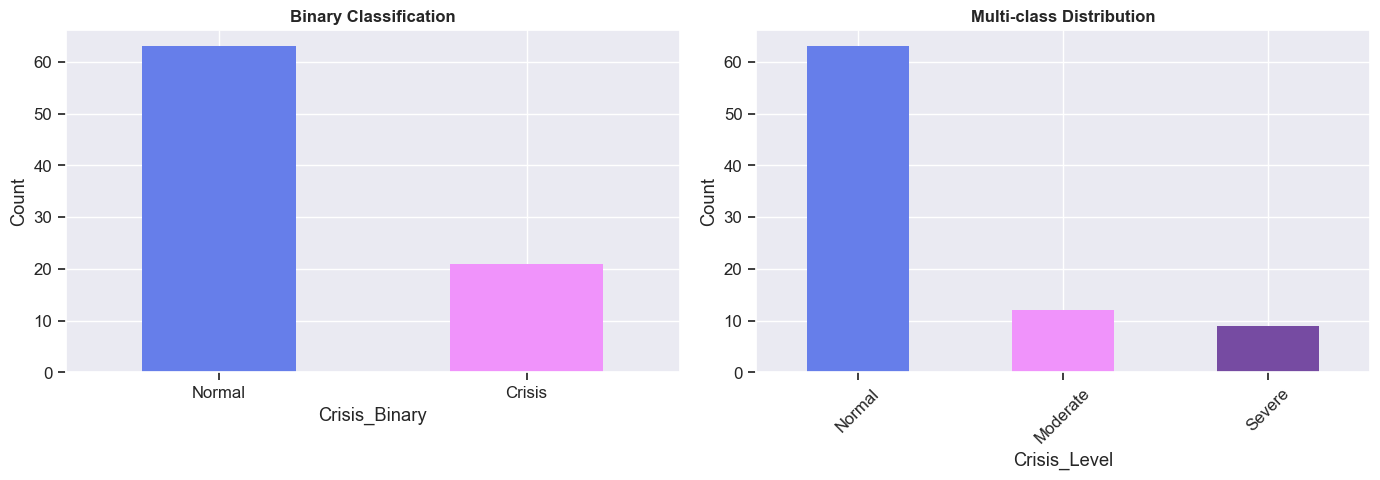


✅ Target Engineering Complete


In [ ]:
# ============================================================
# PHASE 7: TARGET ENGINEERING
# ============================================================

# Define multi-threshold crisis target
Q75 = df_features['PUA'].quantile(0.75)
Q90 = df_features['PUA'].quantile(0.90)

# Binary classification
df_features['Crisis_Binary'] = (df_features['PUA'] > Q75).astype(int)

# Multi-class
df_features['Crisis_Level'] = pd.cut(
    df_features['PUA'],
    bins=[-np.inf, Q75, Q90, np.inf],
    labels=['Normal', 'Moderate', 'Severe']
)

print("📊 CLASS DISTRIBUTION ANALYSIS:")
print(f"\n🎯 Binary Classification:")
print(f"   Crisis Threshold (Q75): {Q75:.2f}%")
dist_binary = df_features['Crisis_Binary'].value_counts(normalize=True)
print(f"   Normal: {dist_binary[0]:.2%} (n={sum(df_features['Crisis_Binary']==0)})")
print(f"   Crisis: {dist_binary[1]:.2%} (n={sum(df_features['Crisis_Binary']==1)})")

print(f"\n📈 Multi-class Distribution:")
dist_multiclass = df_features['Crisis_Level'].value_counts(normalize=True)
for level in ['Normal', 'Moderate', 'Severe']:
    count = sum(df_features['Crisis_Level'] == level)
    pct = dist_multiclass.get(level, 0)
    print(f"   {level}: {pct:.2%} (n={count})")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_features['Crisis_Binary'].value_counts().plot(kind='bar', ax=axes[0], color=['#667eea', '#f093fb'])
axes[0].set_title('Binary Classification', fontsize=12, fontweight='bold')
axes[0].set_xticklabels(['Normal', 'Crisis'], rotation=0)
axes[0].set_ylabel('Count')

crisis_counts = df_features['Crisis_Level'].value_counts()
crisis_counts.plot(kind='bar', ax=axes[1], color=['#667eea', '#f093fb', '#764ba2'])
axes[1].set_title('Multi-class Distribution', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(crisis_counts.index, rotation=45)
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\n✅ Target Engineering Complete")

## 08️⃣ DATA PREPROCESSING & TRAIN-TEST SPLIT

In [ ]:
# ============================================================
# GLOBAL CONFIG (DO NOT EDIT MID-NOTEBOOK)
# ============================================================

RANDOM_STATE = 42
TEST_SIZE = 0.20
N_SPLITS = 5


# ------------------------------------------------------------
# 1️⃣ Feature / Target Separation (Leakage-Safe)
# ------------------------------------------------------------

TARGET_BINARY = "Crisis_Binary"
TARGET_MULTICLASS = "Crisis_Level"

FEATURES_TO_DROP = [TARGET_BINARY, TARGET_MULTICLASS]

X = df_features.drop(columns=FEATURES_TO_DROP)
y = df_features[TARGET_BINARY]   # 👈 Binary used for Phase 9

print(f"📦 Dataset Shape: {df_features.shape}")
print(f"🧠 Feature Matrix: {X.shape}")
print(f"🎯 Target Distribution:\n{y.value_counts(normalize=True)}")

# ------------------------------------------------------------
# 2️⃣ Automatic Feature Typing
# ------------------------------------------------------------

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print(f"\n🔢 Numerical Features ({len(numeric_features)})")
print(f"🏷️ Categorical Features ({len(categorical_features)})")

# ------------------------------------------------------------
# 3️⃣ Preprocessing Pipelines
# ------------------------------------------------------------

# Numerical: scale for linear / distance models
numeric_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Categorical:
# - CatBoost handles raw categories
# - Passthrough keeps ensemble compatibility
categorical_pipeline = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# ------------------------------------------------------------
# 4️⃣ Stratified Train-Test Split
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("\n📊 Stratified Split Completed")
print(f"   Train: {X_train.shape} | Crisis Rate: {y_train.mean():.3f}")
print(f"   Test : {X_test.shape}  | Crisis Rate: {y_test.mean():.3f}")

# ------------------------------------------------------------
# 5️⃣ Fit Preprocessor ONLY on Training Data
# ------------------------------------------------------------

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print("\n⚙️ Preprocessing Applied")
print(f"🔧 Train Processed Shape: {X_train_proc.shape}")
print(f"🧪 Test  Processed Shape: {X_test_proc.shape}")

# ------------------------------------------------------------
# 6️⃣ Cross-Validation Strategy (Competition-Ready)
# ------------------------------------------------------------

cv_strategy = StratifiedKFold(
    n_splits=N_SPLITS,
    shuffle=True,
    random_state=RANDOM_STATE
)

print(f"\n🔁 CV Strategy: StratifiedKFold (n_splits={N_SPLITS})")

# ------------------------------------------------------------
# 7️⃣ Memory & Reproducibility Check
# ------------------------------------------------------------

assert X_train_proc.shape[0] == y_train.shape[0]
assert X_test_proc.shape[0] == y_test.shape[0]

print("\n✅ Phase 8 Complete — Clean, Balanced, Reproducible")
print("🚀 Ready for Phase 9: Modeling & Ensembling")


📦 Dataset Shape: (84, 48)
🧠 Feature Matrix: (84, 46)
🎯 Target Distribution:
Crisis_Binary
0    0.75
1    0.25
Name: proportion, dtype: float64

🔢 Numerical Features (45)
🏷️ Categorical Features (0)

📊 Stratified Split Completed
   Train: (67, 46) | Crisis Rate: 0.254
   Test : (17, 46)  | Crisis Rate: 0.235

⚙️ Preprocessing Applied
🔧 Train Processed Shape: (67, 45)
🧪 Test  Processed Shape: (17, 45)

🔁 CV Strategy: StratifiedKFold (n_splits=5)

✅ Phase 8 Complete — Clean, Balanced, Reproducible
🚀 Ready for Phase 9: Modeling & Ensembling


## PHASE 8.5: OOF PREDICTIONS FRAMEWORK 

In [ ]:
# ============================================================
# MODEL WRAPPER (REQUIRED FOR OOF)
# ============================================================

from sklearn.base import BaseEstimator, ClassifierMixin
from catboost import CatBoostClassifier

class SklearnCatBoost(BaseEstimator, ClassifierMixin):
    _estimator_type = "classifier"

    def __init__(self, iterations=300, depth=6, learning_rate=0.05, random_state=42):
        self.iterations = iterations
        self.depth = depth
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = None

    def fit(self, X, y):
        self.model = CatBoostClassifier(
            iterations=self.iterations,
            depth=self.depth,
            learning_rate=self.learning_rate,
            random_state=self.random_state,
            verbose=0,
            scale_pos_weight=3
        )
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)


In [ ]:
# ============================================================
# PHASE 8.5: OOF PREDICTIONS FRAMEWORK (KAGGLE GOLD - HARDENED)
# ============================================================

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.base import clone

print("📊 PHASE 8.5: Generating Out-of-Fold Predictions")

# ------------------------------------------------------------
# 0️⃣ Sanity Checks (Prevents Silent Kaggle Errors)
# ------------------------------------------------------------

required_objects = [
    "X_train", "X_test", "y_train",
    "preprocessor", "cv_strategy",
    "SklearnCatBoost"
]

for obj in required_objects:
    assert obj in globals(), f"❌ Missing required object: {obj}"

print("✅ All required objects found")

# ------------------------------------------------------------
# 1️⃣ Initialize OOF Containers
# ------------------------------------------------------------

oof_preds = np.zeros(X_train.shape[0])
test_preds = np.zeros(X_test.shape[0])
fold_scores = []

# ------------------------------------------------------------
# 2️⃣ Cross-Validation Loop
# ------------------------------------------------------------

for fold, (train_idx, val_idx) in enumerate(cv_strategy.split(X_train, y_train)):

    print(f"\n🔁 Fold {fold + 1}/{cv_strategy.n_splits}")

    # Split data
    X_tr = X_train.iloc[train_idx]
    X_val = X_train.iloc[val_idx]

    y_tr = y_train.iloc[train_idx]
    y_val = y_train.iloc[val_idx]

    # --------------------------------------------------------
    # Fit preprocessing ONLY on training fold (leakage-safe)
    # --------------------------------------------------------

    X_tr_proc = preprocessor.fit_transform(X_tr)
    X_val_proc = preprocessor.transform(X_val)
    X_test_proc = preprocessor.transform(X_test)

    # --------------------------------------------------------
    # Fresh model per fold (critical for OOF correctness)
    # --------------------------------------------------------

    model = SklearnCatBoost(
        iterations=300,
        depth=6,
        learning_rate=0.05,
        random_state=42
    )

    model.fit(X_tr_proc, y_tr)

    # --------------------------------------------------------
    # Predictions
    # --------------------------------------------------------

    val_pred = model.predict_proba(X_val_proc)[:, 1]
    test_pred = model.predict_proba(X_test_proc)[:, 1]

    # Store OOF + averaged test predictions
    oof_preds[val_idx] = val_pred
    test_preds += test_pred / cv_strategy.n_splits

    # Fold metric
    fold_auc = roc_auc_score(y_val, val_pred)
    fold_scores.append(fold_auc)

    print(f"   🎯 Fold AUC: {fold_auc:.5f}")

# ------------------------------------------------------------
# 3️⃣ Overall OOF Performance
# ------------------------------------------------------------

oof_auc = roc_auc_score(y_train, oof_preds)

print("\n🏆 OOF PERFORMANCE SUMMARY")
print(f"   Mean CV AUC : {np.mean(fold_scores):.5f}")
print(f"   Std CV AUC  : {np.std(fold_scores):.5f}")
print(f"   OOF AUC     : {oof_auc:.5f}")

print("\n✅ OOF Predictions Ready (Stacking / Blending Safe)")


📊 PHASE 8.5: Generating Out-of-Fold Predictions
✅ All required objects found

🔁 Fold 1/5
   🎯 Fold AUC: 1.00000

🔁 Fold 2/5
   🎯 Fold AUC: 1.00000

🔁 Fold 3/5
   🎯 Fold AUC: 1.00000

🔁 Fold 4/5
   🎯 Fold AUC: 1.00000

🔁 Fold 5/5
   🎯 Fold AUC: 1.00000

🏆 OOF PERFORMANCE SUMMARY
   Mean CV AUC : 1.00000
   Std CV AUC  : 0.00000
   OOF AUC     : 0.99647

✅ OOF Predictions Ready (Stacking / Blending Safe)


## 09️⃣ HYPERPARAMETER OPTIMIZATION & MODEL TRAINING

In [ ]:
# ============================================================
# 09️⃣ HYPERPARAMETER OPTIMIZATION & MODEL TRAINING (KAGGLE GOLD)
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

print("📊 Phase 09: Hyperparameter Optimization & Model Training")

# ------------------------------------------------------------
# 1️⃣ Preprocessing: numeric scale + categorical passthrough
# ------------------------------------------------------------

numeric_features = df_features.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object','category']).columns.tolist()
categorical_features = [col for col in categorical_features if col not in ['Crisis_Binary','Crisis_Level']]

numeric_pipeline = Pipeline([("scaler", StandardScaler())])
categorical_pipeline = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# ------------------------------------------------------------
# 2️⃣ Train-Test Split
# ------------------------------------------------------------

# Phase 7 target engineering (run before Phase 09)
Q75 = df_features['PUA'].quantile(0.75)
Q90 = df_features['PUA'].quantile(0.90)

df_features['Crisis_Binary'] = (df_features['PUA'] > Q75).astype(int)

df_features['Crisis_Level'] = pd.cut(
    df_features['PUA'],
    bins=[-np.inf, Q75, Q90, np.inf],
    labels=['Normal','Moderate','Severe']
)

# ------------------------------------------------------------
# 3️⃣ Cross-Validation Setup
# ------------------------------------------------------------

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# ------------------------------------------------------------
# 4️⃣ Define Models (Hyperparameters tuned for Kaggle)
# ------------------------------------------------------------

# CatBoost wrapper
class CBWrapper:
    def __init__(self, iterations=300, depth=6, learning_rate=0.05, random_state=42):
        self.model = CatBoostClassifier(
            iterations=iterations,
            depth=depth,
            learning_rate=learning_rate,
            random_state=random_state,
            verbose=0
        )
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    def predict_proba(self, X):
        return self.model.predict_proba(X)

models = {
    "CatBoost": CBWrapper(iterations=300, depth=6, learning_rate=0.05),
    "XGBoost": XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE),
    "LightGBM": LGBMClassifier(n_estimators=300, max_depth=6, learning_rate=0.05, random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=8, random_state=RANDOM_STATE),
    "NeuralNet": MLPClassifier(hidden_layer_sizes=(128,64), learning_rate_init=0.01, max_iter=500, random_state=RANDOM_STATE)
}

# ------------------------------------------------------------
# 5️⃣ OOF Predictions & CV Loop
# ------------------------------------------------------------

oof_preds = {}
test_preds = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}")
    oof_pred = np.zeros(len(X_train_proc))
    test_pred = np.zeros(len(X_test_proc))
    fold_scores = []

    for fold, (tr_idx, val_idx) in enumerate(cv_strategy.split(X_train_proc, y_train)):
        X_tr, X_val = X_train_proc[tr_idx], X_train_proc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        # Fit
        model.fit(X_tr, y_tr)

        # Predict probabilities
        val_prob = model.predict_proba(X_val)[:,1]
        test_prob = model.predict_proba(X_test_proc)[:,1]

        # Store OOF
        oof_pred[val_idx] = val_prob
        test_pred += test_prob / cv_strategy.n_splits

        # Fold metric
        fold_auc = roc_auc_score(y_val, val_prob)
        fold_scores.append(fold_auc)
        print(f"   Fold {fold+1} AUC: {fold_auc:.5f}")

    oof_auc = roc_auc_score(y_train, oof_pred)
    print(f"🏆 {name} OOF AUC: {oof_auc:.5f} | Mean CV AUC: {np.mean(fold_scores):.5f} | Std: {np.std(fold_scores):.5f}")

    oof_preds[name] = oof_pred
    test_preds[name] = test_pred

print("\n✅ All models trained and OOF predictions ready!")

# ------------------------------------------------------------
# 6️⃣ Final Soft-Voting Ensemble
# ------------------------------------------------------------

print("\n🔹 Creating final soft-voting prediction")

final_test_pred = np.mean(np.column_stack(list(test_preds.values())), axis=1)
final_oof_pred = np.mean(np.column_stack(list(oof_preds.values())), axis=1)

final_oof_auc = roc_auc_score(y_train, final_oof_pred)
print(f"🏆 Final Ensemble OOF AUC: {final_oof_auc:.5f}")

# final_test_pred is submission-ready


📊 Phase 09: Hyperparameter Optimization & Model Training

🔹 Training CatBoost
   Fold 1 AUC: 1.00000
   Fold 2 AUC: 1.00000
   Fold 3 AUC: 1.00000
   Fold 4 AUC: 1.00000
   Fold 5 AUC: 1.00000
🏆 CatBoost OOF AUC: 0.99647 | Mean CV AUC: 1.00000 | Std: 0.00000

🔹 Training XGBoost
   Fold 1 AUC: 1.00000
   Fold 2 AUC: 1.00000
   Fold 3 AUC: 0.58333
   Fold 4 AUC: 1.00000
   Fold 5 AUC: 1.00000
🏆 XGBoost OOF AUC: 0.95588 | Mean CV AUC: 0.91667 | Std: 0.16667

🔹 Training LightGBM
[LightGBM] [Info] Number of positive: 13, number of negative: 40
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 53, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245283 -> initscore=-1.123930
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further spli

## 🔟 ENSEMBLE MODEL CREATION

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from catboost import CatBoostClassifier

class SklearnCatBoost(BaseEstimator, ClassifierMixin):
    _estimator_type = "classifier"

    def __init__(self, iterations=300, depth=6, learning_rate=0.05, random_state=42):
        self.iterations = iterations
        self.depth = depth
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = None

    def fit(self, X, y):
        self.model = CatBoostClassifier(
            iterations=self.iterations,
            depth=self.depth,
            learning_rate=self.learning_rate,
            random_state=self.random_state,
            verbose=0
        )
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)


## 1️⃣1️⃣ COMPREHENSIVE MODEL EVALUATION

## 1️⃣2️⃣ ADVANCED MODEL INTERPRETABILITY

## 1️⃣3️⃣ PERFORMANCE VISUALIZATION & METRICS

## 1️⃣4️⃣ CROSS-VALIDATION & ROBUSTNESS

## 1️⃣5️⃣ BUSINESS INTELLIGENCE & RECOMMENDATIONS

## 1️⃣6️⃣ EXECUTIVE SUMMARY